<a href="https://colab.research.google.com/github/alison-engfis/alison-engfis/blob/main/nivel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NIVEL DO GUAÍBA AO LONGO DE UM ANO

Importando as bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Lendo o arquivo com os dados do nível

In [ ]:
df = pd.read_csv('sph4_out.csv', sep= ',')

df.head(21)

,% year,month,day,hour,minute,second,water level (meters)
0,2023,9,14,20,40,0,2.529
1,2023,9,14,20,50,0,2.529
2,2023,9,14,21,0,0,2.529
3,2023,9,14,21,10,0,2.529
4,2023,9,14,21,20,0,2.529
5,2023,9,14,21,30,0,2.529
6,2023,9,14,21,40,0,2.529
7,2023,9,14,21,50,0,2.529
8,2023,9,14,22,0,0,2.528
9,2023,9,14,22,10,0,2.528


In [ ]:
df.tail()

,% year,month,day,hour,minute,second,water level (meters)
50770,2024,9,18,12,20,0,0.886
50771,2024,9,18,12,30,0,0.884
50772,2024,9,18,12,40,0,0.883
50773,2024,9,18,12,50,0,0.882
50774,2024,9,18,13,0,0,0.882


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50775 entries, 0 to 50774
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   % year                 50775 non-null  int64  
 1    month                 50775 non-null  int64  
 2    day                   50775 non-null  int64  
 3    hour                  50775 non-null  int64  
 4    minute                50775 non-null  int64  
 5    second                50775 non-null  int64  
 6    water level (meters)  50775 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 2.7 MB


In [ ]:
df.describe()

,% year,month,day,hour,minute,second,water level (meters)
count,50775.000000,50775.000000,50775.000000,50775.000000,50775.000000,50775.0,50775.000000
mean,2023.731049,6.407307,15.851856,11.488646,24.999705,0.0,1.712132
std,0.443419,3.429088,8.893112,6.930550,17.078650,0.0,0.939410
min,2023.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.457000
25%,2023.000000,3.000000,8.000000,5.000000,10.000000,0.0,1.014000
50%,2024.000000,6.000000,16.000000,11.000000,30.000000,0.0,1.386000
75%,2024.000000,9.000000,24.000000,17.000000,40.000000,0.0,2.238000
max,2024.000000,12.000000,31.000000,23.000000,50.000000,0.0,5.156000


Percebi que algumas colunas tinham uma string inútil à esquerda. Portanto, corrigi o problema

In [ ]:
df.rename(columns= {'% year' : 'year'}, inplace= True)

In [ ]:
df.head()

,year,month,day,hour,minute,second,water level (meters)
0,2023,9,14,20,40,0,2.529
1,2023,9,14,20,50,0,2.529
2,2023,9,14,21,0,0,2.529
3,2023,9,14,21,10,0,2.529
4,2023,9,14,21,20,0,2.529


In [ ]:
print(df.columns)

Index(['year', ' month', ' day', ' hour', ' minute', ' second',
       ' water level (meters)'],
      dtype='object')


In [ ]:
df.rename(columns= {' month' : 'month', ' day' : 'day', ' hour' : 'hour', ' minute' : 'minute', ' second' : 'second', ' water level (meters)' : 'water_level(m)'}, inplace= True)

Conferindo se está tudo okay

In [ ]:
print(df.columns)

Index(['year', 'month', 'day', 'hour', 'minute', 'second', 'water_level(m)'], dtype='object')


In [ ]:
df.head()

,year,month,day,hour,minute,second,water_level(m)
0,2023,9,14,20,40,0,2.529
1,2023,9,14,20,50,0,2.529
2,2023,9,14,21,0,0,2.529
3,2023,9,14,21,10,0,2.529
4,2023,9,14,21,20,0,2.529


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50775 entries, 0 to 50774
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            50775 non-null  int64  
 1   month           50775 non-null  int64  
 2   day             50775 non-null  int64  
 3   hour            50775 non-null  int64  
 4   minute          50775 non-null  int64  
 5   second          50775 non-null  int64  
 6   water_level(m)  50775 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 2.7 MB


In [ ]:
df.describe()

,year,month,day,hour,minute,second,water_level(m)
count,50775.000000,50775.000000,50775.000000,50775.000000,50775.000000,50775.0,50775.000000
mean,2023.731049,6.407307,15.851856,11.488646,24.999705,0.0,1.712132
std,0.443419,3.429088,8.893112,6.930550,17.078650,0.0,0.939410
min,2023.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.457000
25%,2023.000000,3.000000,8.000000,5.000000,10.000000,0.0,1.014000
50%,2024.000000,6.000000,16.000000,11.000000,30.000000,0.0,1.386000
75%,2024.000000,9.000000,24.000000,17.000000,40.000000,0.0,2.238000
max,2024.000000,12.000000,31.000000,23.000000,50.000000,0.0,5.156000


In [ ]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])

In [ ]:
df.head()

,year,month,day,hour,minute,second,water_level(m),datetime
0,2023,9,14,20,40,0,2.529,2023-09-14 20:40:00
1,2023,9,14,20,50,0,2.529,2023-09-14 20:50:00
2,2023,9,14,21,0,0,2.529,2023-09-14 21:00:00
3,2023,9,14,21,10,0,2.529,2023-09-14 21:10:00
4,2023,9,14,21,20,0,2.529,2023-09-14 21:20:00


In [ ]:
df.describe()

,year,month,day,hour,minute,second,water_level(m),datetime
count,50775.000000,50775.000000,50775.000000,50775.000000,50775.000000,50775.0,50775.000000,50775
mean,2023.731049,6.407307,15.851856,11.488646,24.999705,0.0,1.712132,2024-03-22 10:05:41.884785664
min,2023.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.457000,2023-09-14 20:40:00
25%,2023.000000,3.000000,8.000000,5.000000,10.000000,0.0,1.014000,2023-12-25 07:35:00
50%,2024.000000,6.000000,16.000000,11.000000,30.000000,0.0,1.386000,2024-03-22 18:50:00
75%,2024.000000,9.000000,24.000000,17.000000,40.000000,0.0,2.238000,2024-06-21 12:05:00
max,2024.000000,12.000000,31.000000,23.000000,50.000000,0.0,5.156000,2024-09-18 13:00:00
std,0.443419,3.429088,8.893112,6.930550,17.078650,0.0,0.939410,NaN


Plotando o gráfico via Seaborn

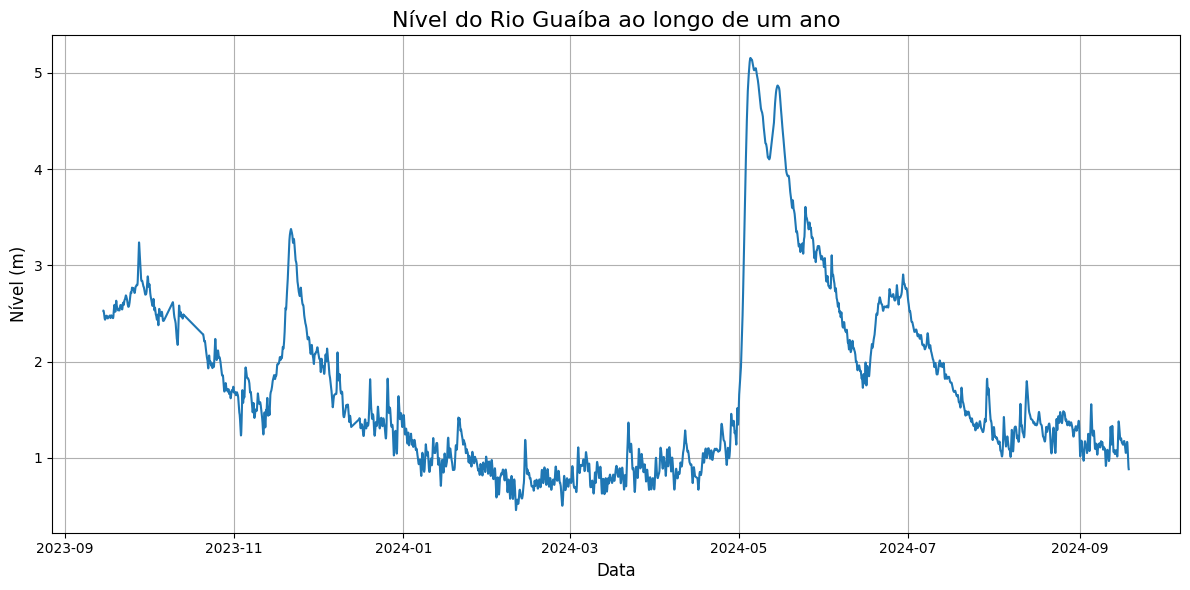

In [ ]:
plt.figure(figsize= (12, 6))

sns.lineplot(x= 'datetime', y= 'water_level(m)', data= df)
#sns.lineplot(x='datetime', y= 'water_level(m)', data= df, fill= True)
plt.title('Nível do Rio Guaíba ao longo de um ano', fontsize= 16)
plt.xlabel('Data', fontsize= 12)
plt.ylabel('Nível (m)', fontsize= 12)
plt.grid(True)
plt.tight_layout()
plt.show()

Experimentando o Plotly (deu ruim nação)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x= 'datetime', y= 'water_level(m)', data= df, ax= ax)

fig = px.line(df, x= 'datetime', y= 'water_level(m)', title= 'Nível do Rio Guaíba')
fig.show()

# ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed